# Examples

This document contains a few examples where the compiler function `translate` is used to demonstrate its functionality. For details on how the function and the optimization levels were implemented please refer to the [task03_details](task03_details.ipynb) notebook.

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere
import qiskit.quantum_info as qi
from translate import translate

## Example 1

A few random single-qubit gates from the allowed gate set: (I, H, X, Y, Z, RX, RY, RZ, CNOT, CZ). No optimization applied (`op_level = 0`) and identity gates retained as Rz(0) gates (`trans_id = True`).

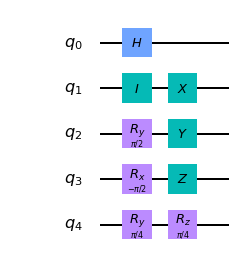

In [2]:
# Circuit to be translated
qc1 = QuantumCircuit(5)
qc1.h(0)
qc1.i(1)
qc1.x(1)
qc1.ry(np.pi/2,2)
qc1.y(2)
qc1.rx(-np.pi/2,3)
qc1.z(3)
qc1.ry(np.pi/4,4)
qc1.rz(np.pi/4,4)
qc1.draw(output='mpl')

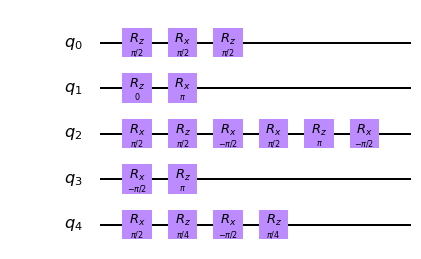

In [3]:
qc1_trans = translate(qc1, op_level=0, trans_id = True)
qc1_trans.draw('mpl')

Since we are using single qubit gates only, we can compare the Bloch Sphere representations of the output states generated by these two circuits to make sure they are equivalent:

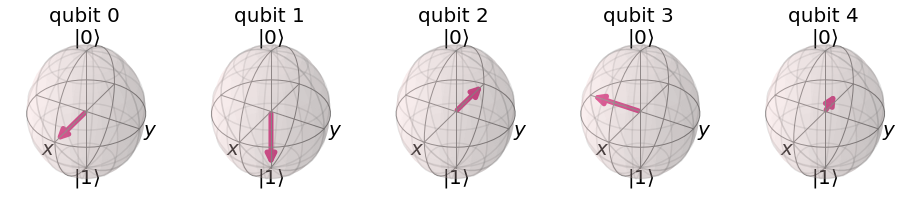

In [4]:
# Bloch sphere representation of original circuit
plot_bloch_multivector(qi.Statevector.from_instruction(qc1).data)

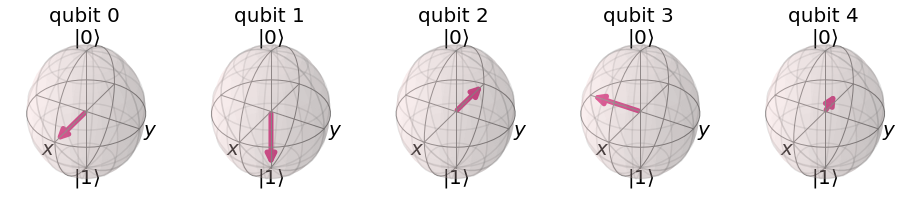

In [5]:
# Bloch sphere representation of compiled circuit
plot_bloch_multivector(qi.Statevector.from_instruction(qc1_trans).data)

## Example 2

Circuit with gates from the whole set. For overhead analysis, please refer to the [task03_details](task03_details.ipynb) notebook.

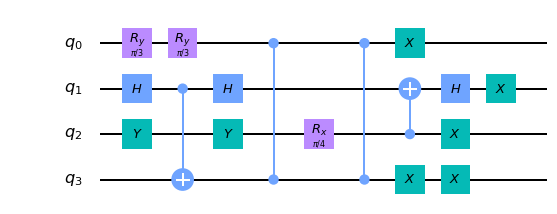

In [6]:
# Circuit to be translated
qc2 = QuantumCircuit(4)
qc2.ry(np.pi/3,0)
qc2.ry(np.pi/3,0)
qc2.h(1)
qc2.cx(1,3)
qc2.cz(3,0)
qc2.y(2)
qc2.y(2)
qc2.cz(0,3)
qc2.rx(np.pi/4,2)
qc2.h(1)
qc2.cx(2,1)
qc2.h(1)
qc2.x(3)
qc2.x(range(4))
qc2.draw('mpl')

In [7]:
print("Number of gates in original circuit: ", qc2.size())

Number of gates in original circuit:  17


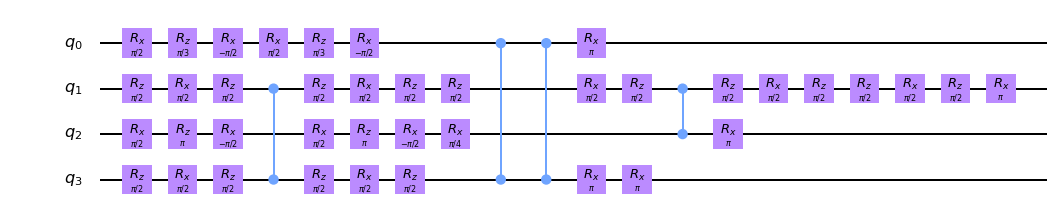

In [8]:
# No translation without optimization
qc2a_trans = translate(qc2, op_level=0, trans_id = True)
qc2a_trans.draw('mpl')

In [9]:
print("Number of gates in translated and optimized circuit: ", qc2a_trans.size())

Number of gates in translated and optimized circuit:  43


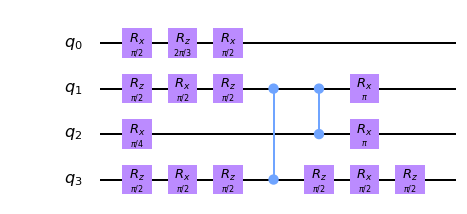

In [10]:
# No translation with optimization level 3
qc2b_trans = translate(qc2, op_level=3)
qc2b_trans.draw('mpl')

In [11]:
print("Number of gates in translated and optimized circuit: ", qc2b_trans.size())

Number of gates in translated and optimized circuit:  17


The qsphere can be used to verify that the output state of both circuits is the same:

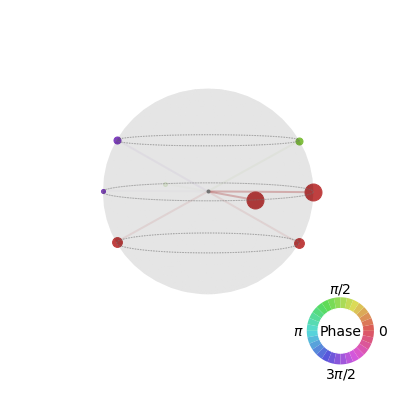

In [12]:
# Qsphere representation of original circuit
plot_state_qsphere(qi.Statevector.from_instruction(qc2).data)

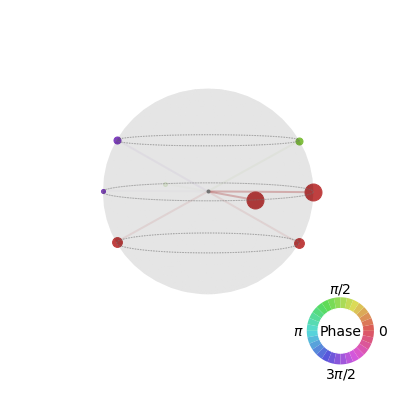

In [13]:
# Qsphere representation of translated and optimized circuit
plot_state_qsphere(qi.Statevector.from_instruction(qc2b_trans).data)